In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = "/camvid/CamVid/"

In [3]:
print("NO. test imgs ", len(glob(BASE_PATH+"test/*")))
print("NO. test labels ", len(glob(BASE_PATH+"test_labels/*")))
print("NO. train imgs ", len(glob(BASE_PATH+"train/*")))
print("NO. train labels ", len(glob(BASE_PATH+"train_labels/*")))
print("NO. val imgs ", len(glob(BASE_PATH+"val/*")))
print("NO. val labels ", len(glob(BASE_PATH+"val_labels/*")))

NO. test imgs  232
NO. test labels  232
NO. train imgs  369
NO. train labels  369
NO. val imgs  100
NO. val labels  100


In [4]:
import pandas as pd
classes = pd.read_csv(BASE_PATH+"class_dict.csv")

In [5]:
n_classes = len(classes)

In [6]:
classes = classes.set_index("name")

In [7]:
classes_dict = {cl:list(classes.loc[cl, :]) for cl in classes.index}
classes_dict

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'SUVPickupTruck': [64, 128, 192],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

In [8]:
def show_img(img , mask=False):
    fig ,ax = plt.subplots(figsize=(6,6))
    if not mask:
        img = plt.imread(BASE_PATH+img)
    ax.imshow(img)
    plt.show()
    return img

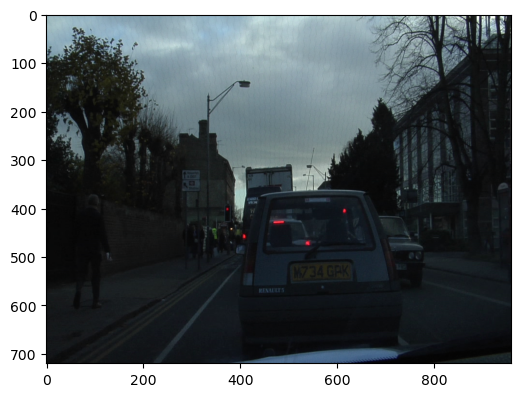

array([[[0.6       , 0.7019608 , 0.7294118 ],
        [0.6       , 0.7019608 , 0.7294118 ],
        [0.58431375, 0.6901961 , 0.7254902 ],
        ...,
        [0.10588235, 0.12156863, 0.10980392],
        [0.10196079, 0.10588235, 0.09803922],
        [0.09411765, 0.09803922, 0.09019608]],

       [[0.58431375, 0.6862745 , 0.7137255 ],
        [0.6       , 0.7019608 , 0.7294118 ],
        [0.5921569 , 0.69803923, 0.73333335],
        ...,
        [0.10588235, 0.12156863, 0.10980392],
        [0.10196079, 0.10588235, 0.10588235],
        [0.09411765, 0.09803922, 0.09803922]],

       [[0.60784316, 0.70980394, 0.7372549 ],
        [0.6156863 , 0.7176471 , 0.74509805],
        [0.60784316, 0.7176471 , 0.7411765 ],
        ...,
        [0.10588235, 0.12156863, 0.11764706],
        [0.10196079, 0.10588235, 0.10588235],
        [0.09411765, 0.09803922, 0.09803922]],

       ...,

       [[0.06666667, 0.06666667, 0.07450981],
        [0.05882353, 0.05882353, 0.06666667],
        [0.05098039, 0

In [9]:
show_img("train/0001TP_009210.png")

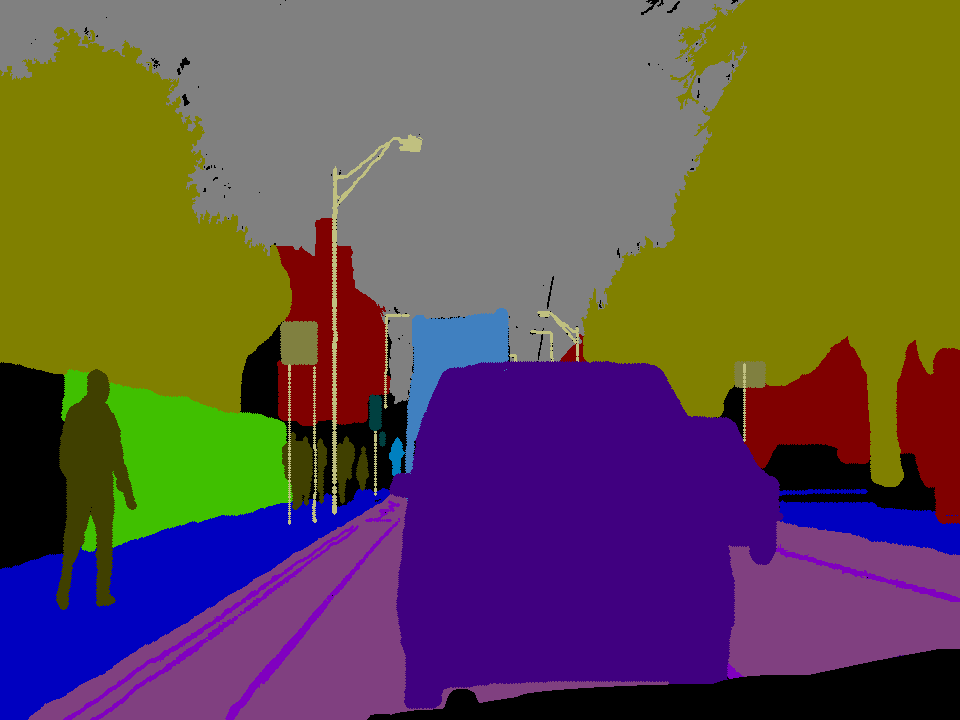

In [10]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img(BASE_PATH + '/train_labels/0001TP_009210_L.png')
img
#img = show_img("train_labels/0001TP_009210_L.png")

In [11]:
img = np.array(img)
img.shape

(720, 960, 3)

In [12]:
def adjust_mask(mask, flat=False):
    
    semantic_map = []
    for colour in list(classes_dict.values()):        
        equality = np.equal(mask, colour)# 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)# 256x256 If all True, then True, else False
        semantic_map.append(class_map)# List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)# 256x256x32 True only at the found color, and all False otherwise.
    if flat:
      semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

In [13]:
new_mask = adjust_mask(img)

In [14]:
new_mask.shape

(720, 960, 32)

In [15]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(classes_dict.items())}

In [16]:
idx2rgb

{0: array([ 64, 128,  64]),
 1: array([192,   0, 128]),
 2: array([  0, 128, 192]),
 3: array([  0, 128,  64]),
 4: array([128,   0,   0]),
 5: array([ 64,   0, 128]),
 6: array([ 64,   0, 192]),
 7: array([192, 128,  64]),
 8: array([192, 192, 128]),
 9: array([ 64,  64, 128]),
 10: array([128,   0, 192]),
 11: array([192,   0,  64]),
 12: array([128, 128,  64]),
 13: array([192,   0, 192]),
 14: array([128,  64,  64]),
 15: array([ 64, 192, 128]),
 16: array([64, 64,  0]),
 17: array([128,  64, 128]),
 18: array([128, 128, 192]),
 19: array([  0,   0, 192]),
 20: array([192, 128, 128]),
 21: array([128, 128, 128]),
 22: array([ 64, 128, 192]),
 23: array([ 0,  0, 64]),
 24: array([ 0, 64, 64]),
 25: array([192,  64, 128]),
 26: array([128, 128,   0]),
 27: array([192, 128, 192]),
 28: array([64,  0, 64]),
 29: array([192, 192,   0]),
 30: array([0, 0, 0]),
 31: array([ 64, 192,   0])}

In [17]:
def map_class_to_rgb(p):
    return idx2rgb[p[0]]

In [18]:
rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))

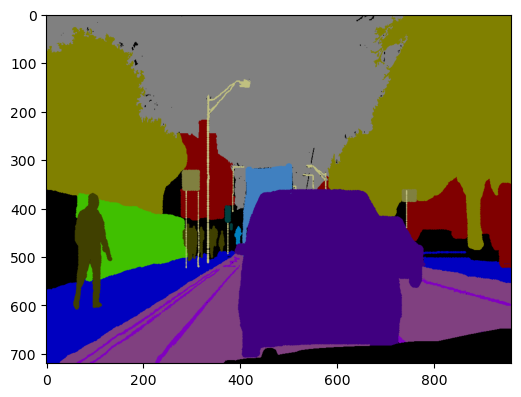

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       ...,

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [19]:
show_img(rgb_mask,mask=True)

In [20]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [21]:
def unet(n_classes, pretrained_weights = None,input_size = (256,256,3), flat=False, ohe=True):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(n_classes, (1,1), activation = 'softmax')(conv9)
    conv10 = Conv2D(n_classes, (1,1), padding='same')(conv9)
    if flat:
      output_layer = Reshape((256*256,n_classes))(conv10)
    else:
      output_layer = conv10
    output_layer = Activation('softmax')(output_layer)
     

    model = Model(inputs = inputs, outputs = output_layer)

    if ohe:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    else:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [22]:
model = unet(n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
# def load_CAMVID(data_type='train', enc='ohe', shape='normal'):
#   img_path = str(BASE_PATH) + '/' + data_type + '/'
#   labels_path = str(BASE_PATH) + '/' + data_type + '_labels/'
#   # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
#   x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
#   if(enc=='ohe'):
#     y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
#   return x, y

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
#config 
view = 0
batch_sz = 4
epochs = 10
steps_per_epoch = 1000
validation_steps = 100

In [26]:
data_gen_args = dict(rescale=1./255)

# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))
mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=batch_sz,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

val_image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))
val_generator = zip(val_image_generator, val_mask_generator)


Found 369 images belonging to 1 classes.
Found 369 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [27]:
def train_generator_fn():
    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)    

In [28]:
def val_generator_fn():
    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  

In [29]:
n_train_samples = len(os.listdir(str(BASE_PATH) + '/train/'))
n_train_samples

369

In [30]:
model = unet(n_classes)
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=n_train_samples,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10


2023-03-07 17:16:54.183414: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


369/369 [==============================] - ETA: 0s - loss: 1.2868 - accuracy: 0.6546
Epoch 1: val_loss improved from inf to 0.93965, saving model to unet_camvid.hdf5
369/369 [==============================] - 303s 782ms/step - loss: 1.2868 - accuracy: 0.6546 - val_loss: 0.9397 - val_accuracy: 0.7595
Epoch 2/10
369/369 [==============================] - ETA: 0s - loss: 0.7073 - accuracy: 0.8048
Epoch 2: val_loss improved from 0.93965 to 0.66804, saving model to unet_camvid.hdf5
369/369 [==============================] - 269s 729ms/step - loss: 0.7073 - accuracy: 0.8048 - val_loss: 0.6680 - val_accuracy: 0.8238
Epoch 3/10
369/369 [==============================] - ETA: 0s - loss: 0.5308 - accuracy: 0.8475
Epoch 3: val_loss improved from 0.66804 to 0.53144, saving model to unet_camvid.hdf5
369/369 [==============================] - 271s 735ms/step - loss: 0.5308 - accuracy: 0.8475 - val_loss: 0.5314 - val_accuracy: 0.8582
Epoch 4/10
369/369 [==============================] - ETA: 0s - los

In [31]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  fig , ax = plt.subplots(1,3,figsize=(10,10))
  
  # Img
  ax[0].imshow(img)
  ax[0].set_title("Orignal Image")
  
  # Predict
  pred_mask = model.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
  ax[1].imshow(rgb_mask)
  ax[1].set_title("Predicted Mask")

              
  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
  ax[2].imshow((gt_mask).astype(np.uint8))
  ax[2].set_title("Ground truth")

1/1 [==============================] - 0s 350ms/step


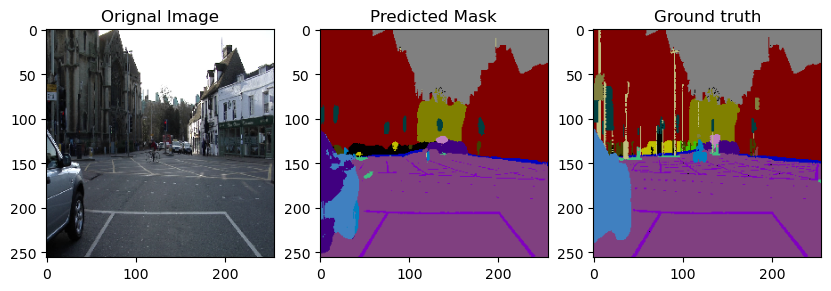

In [32]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')